In [1]:
from code.data_utils import get_token, get_audio_analysis, get_playlist_tracks, get_auth_header
import pandas as pd
import numpy as np
import time

5835805e22a345948373bd954162324c 41b27d9b0cbe44deb1d9edd7d306160d


In [2]:
token=get_token()
print(token)

BQAlP_shscXeaIdBKH0gZq2cXmZIm2FkVwGh2oRDjkwyZupyob_T9Znpupr46c63K-ZIzTF1HV963exkgi3_M4BNS4qQ9SQKOHyXBeoozpyX0fmkxu8


In [3]:
playlist_id = '0RGtQZqaJJQjxeD3aUDLjP'
#Phanta - https://open.spotify.com/playlist/0RGtQZqaJJQjxeD3aUDLjP?si=92423fcf3867402a

#https://open.spotify.com/playlist/4OrSdy12nqL68n9Hxmz4ks?si=9504fd7043584b7a
#https://open.spotify.com/playlist/4eDEKnrtFY5nvekNGfVHrk?si=ae960853cd3d4a73
#https://open.spotify.com/playlist/24l2NVES7hOeA7VyNg2fX4?si=3c8fb07521a7462d 

plist_tracks = get_playlist_tracks(token, playlist_id, summarize=True)
plist_tracks.head()

,artist_name,artist_id,track_name,track_id,track_popularity
0,Tim Buckley,6zHRqvws8dVeqL8D31ponr,Phantasmagoria in Two,1EfWxxlaLLiwnLS3ABr8vu,42
1,Tim Buckley,6zHRqvws8dVeqL8D31ponr,Pleasant Street,1L8n3DR0g5w36X51i2k8A4,38
2,Tim Buckley,6zHRqvws8dVeqL8D31ponr,Once I Was,6iI6NXjtI3IkjK2k1juqaX,45
3,Wishbone Ash,77zwstbi3x1IxnbDFg6uns,Leaf And Stream,4YgUcH7aKBmP5EeysIjvKD,40
4,Wilco,2QoU3awHVdcHS8LrZEKvSM,How to Fight Loneliness,1CsMuJeMzRqNgS7G0fo1Gv,51


In [40]:
# aa_data = get_audio_analysis(token, plist_tracks.track_id.tolist(), track_names=plist_tracks.track_name.tolist(), sleep_range=(1,3))

In [4]:
def get_full_audio_analysis(token, track_ids, track_names=None, sleep_range=(1,5)):
    headers = get_auth_header(token)
    sleep_min = sleep_range[0]
    sleep_max = sleep_range[1]
    start_time = time.time()
    track_count = 0
    audio_analysis_ls = []
    for i, t_id in enumerate(track_ids):
        url = f'https://api.spotify.com/v1/audio-analysis/{t_id}'
        result = get(url, headers=headers)
        js_result = json.loads(result.content)
        audio_analysis_ls += [js_result]
        print(len(audio_analysis_ls))

        
        print(f'request {i+1} - {len(audio_analysis_ls)} tracks completed')
        r_val = np.random.uniform(sleep_min, sleep_max)
        if (i+1) < len(track_ids):
            print(f'Next request in ~ {int(np.round(r_val))} seconds')
            time.sleep(r_val)
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))
        
    return audio_analysis_ls

In [5]:
from requests import post, get
import json
aa_data = get_full_audio_analysis(token, plist_tracks.track_id.tolist()[:], track_names=plist_tracks.track_name.tolist()[:], sleep_range=(1,5))
# aa_data

1
request 1 - 1 tracks completed
Next request in ~ 4 seconds
Elapsed Time: 4.790961980819702 seconds
2
request 2 - 2 tracks completed
Next request in ~ 3 seconds
Elapsed Time: 8.880249261856079 seconds
3
request 3 - 3 tracks completed
Next request in ~ 3 seconds
Elapsed Time: 12.349445343017578 seconds
4
request 4 - 4 tracks completed
Next request in ~ 5 seconds
Elapsed Time: 18.22071409225464 seconds
5
request 5 - 5 tracks completed
Next request in ~ 2 seconds
Elapsed Time: 21.744473218917847 seconds
6
request 6 - 6 tracks completed
Next request in ~ 2 seconds
Elapsed Time: 24.42870569229126 seconds
7
request 7 - 7 tracks completed
Next request in ~ 2 seconds
Elapsed Time: 27.417747735977173 seconds
8
request 8 - 8 tracks completed
Next request in ~ 2 seconds
Elapsed Time: 30.263105154037476 seconds
9
request 9 - 9 tracks completed
Next request in ~ 2 seconds
Elapsed Time: 33.03667092323303 seconds
10
request 10 - 10 tracks completed
Next request in ~ 4 seconds
Elapsed Time: 38.217464

In [6]:
import numpy as np
from datasketch import MinHash

def minhash_enmfp(enmfp_string, num_perm=128, ngram_size=3):

    # print('num_perm:', num_perm)
    # print('ngram_size:', ngram_size)
    m = MinHash(num_perm=num_perm)
    
    for i in range(len(enmfp_string) - ngram_size + 1):
        ngram = enmfp_string[i:i + ngram_size]
        m.update(ngram.encode('utf8'))
        
    # for char in enmfp_string:
    #     m.update(char.encode('utf8'))

    # Extract the hash values as a vector
    hash_values = np.array(m.hashvalues)
    
    return hash_values

# # Example usage
# enmfp_string = "eJxNmQmSLTcIBK_SR9CGkO5_MWeiN7YjHM-jXtQIiqLgn5ZnxG3za9_t7cY"
# minhash_value = minhash_enmfp(enmfp_string)
# print(minhash_value)

In [64]:
num_perm = 2**11
ngram_size = 2
minhash_value_ls = []
for i in range(len(aa_data)):
    # print(i)
    enmfp_string = aa_data[i]['track']['codestring']#[:25]
    # print(len(enmfp_string))
    # print(len(set(enmfp_string)))
    minhash_value = minhash_enmfp(enmfp_string, num_perm=num_perm, ngram_size=ngram_size)
    minhash_value_ls += [minhash_value]

In [43]:
# print(aa_data[0]['track']['codestring'][:25])
# print(aa_data[2]['track']['codestring'][:25])

In [65]:
s = []

for i in range(len(minhash_value_ls)):
    # print('track %d'%i)
    sim = sum(minhash_value_ls[0]==minhash_value_ls[i]) / num_perm
    s += [sim]
    # print(sim)
        # print(1 - hamming_distance(minhash_value_ls[1],minhash_value_ls[i]) /num_perm)
# len(enmfp_string
s=np.array(s)

print(np.sort(s)[::-1])
print(np.argsort(s)[::-1])

[1.         0.86035156 0.85498047 0.85058594 0.81445312 0.80273438
 0.79248047 0.77734375 0.77441406 0.77050781 0.76904297 0.76367188
 0.76220703 0.75878906 0.74804688 0.74316406 0.74169922 0.74121094
 0.73730469 0.72851562 0.70458984 0.68701172 0.67724609 0.671875
 0.65039062]
[ 0 17 19  7  6  1  3 18 11 15 24 21  5  4  8 23 10 14 13  9 22 20 16  2
 12]


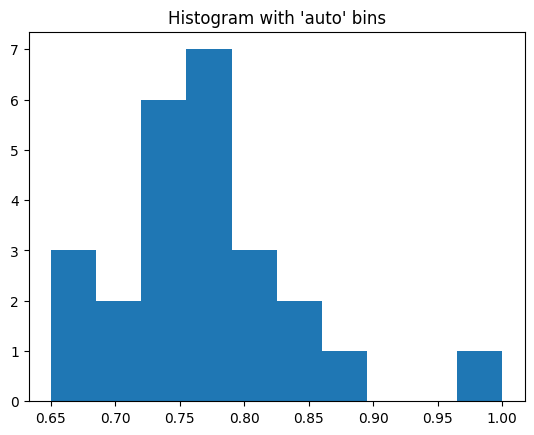

In [66]:
import matplotlib.pyplot as plt
# np.histogram(np.sort(s)[::-1])

plt.hist(s, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [67]:
plist_tracks.iloc[np.argsort(s)[::-1],:]

,artist_name,artist_id,track_name,track_id,track_popularity
0,Tim Buckley,6zHRqvws8dVeqL8D31ponr,Phantasmagoria in Two,1EfWxxlaLLiwnLS3ABr8vu,42
17,Fairport Convention,2LIdnZDzySb04oH40be1fR,A Sailor's Life,5w5iVU4HJFqbjQmELVa2Bf,21
19,Don McLean,1gRNBaI4yn6wCCTvRhGWh8,American Pie,1fDsrQ23eTAVFElUMaf38X,76
7,Love,3Q6OOkfssqoMSTtl11J5Uk,You Set the Scene - 2015 Remaster,1U0OueoBA6vNNhrqCvdNOX,30
6,Trees,1GnREbi8RRTdrtoDIs98EN,Murdoch,7cL1HjybEljdBmOT2LJC6A,18
1,Tim Buckley,6zHRqvws8dVeqL8D31ponr,Pleasant Street,1L8n3DR0g5w36X51i2k8A4,38
3,Wishbone Ash,77zwstbi3x1IxnbDFg6uns,Leaf And Stream,4YgUcH7aKBmP5EeysIjvKD,40
18,Bob Dylan,74ASZWbe4lXaubB36ztrGX,"Lay, Lady, Lay",4uYwlMp841PLJmj1gJJwIq,61
11,Calexico,1OmdWpAh1pucAuZPzJaxIJ,Alone Again Or - Remastered,6KMCmuniYRcMziNzKQOWt5,33
15,Radiohead,4Z8W4fKeB5YxbusRsdQVPb,How to Disappear Completely,2rtGaCAeYtmcIvuZsvgTf6,66


In [26]:
def hamming_distance(minhash1, minhash2):
    assert len(minhash1) == len(minhash2), "MinHash vectors must be of the same length"
    return sum(minhash1!=minhash2)

# Example usage
distance = hamming_distance(minhash_value_ls[0], minhash_value_ls[1])
print(f"Hamming Distance: {distance}")

Hamming Distance: 4062
